# Team Ace - Social Network Analysis

### Include Library Files

In [ ]:
import random
import numpy as np
from pandas import DataFrame
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from py2neo import Node,Relationship,Graph
%matplotlib inline

### Get Data, Clean and Transform

In [ ]:
# Fetching, Cleaning, and Storing User Names in a List
fh1 = open("Data/Names.txt", "r")
nameslist = []
for line in fh1:
    cleanline = line.strip()
    nameslist.append(cleanline)
    
#Getting the AgeList for each User
agelist = []
for i in range(0,250):
    agelist.append(random.randint(15,20))
for i in range(0,500):
    agelist.append(random.randint(21,30))
for i in range(0,200):
    agelist.append(random.randint(31,40))
for i in range(0,50):
    agelist.append(random.randint(41,50))
random.shuffle(agelist)

# Fetching the Gender of every User
genderlist = []
for i in range(0, 1000):
    if random.randint(1,2) == 1:
        genderlist.append('M')
    else:
        genderlist.append('F')
        
# Getting the Nationality of every User
country = ["US", "JAPAN", "FRANCE", "PORTUGAL", "CHILE", "TAIWAN", "SOUTH KOREA", "ITALY", "UAE",
               "COSTA RICA", "SLOVENIA", "BELGIUM", "SPAIN", "SINGAPORE", "UK", "GERMANY", "AUSTRIA", "CANADA",
               "IRELAND", "FINLAND", "NETHERLANDS", "NEW ZEALAND", "QATAR", "SWITZERLAND", "LUXEMBOURG",
               "ICELAND", "AUSTRALIA", "NORWAY", "SWEDEN", "DENMARK"]
countrylist = []
for i in range(0, 1000):
    countrylist.append(country[random.randint(0,29)])
    
frame1 = DataFrame({"Name": nameslist, 
                   "Age": agelist,
                    "Gender": genderlist,
                    "Country": countrylist})

frame1['Id'] = np.arange(1000)
frame2 = frame1.reindex(columns = ["Id", "Name", "Age", "Gender", "Country"])


### Data Visualization

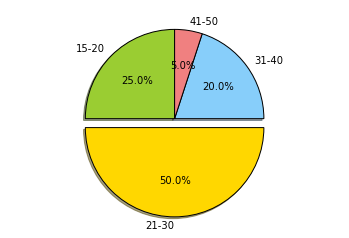

In [30]:
countryCode = []
countryIndex =[]

for i in countrylist:
    countryCode.append(country.index(i))
for i in country:
    countryIndex.append(country.index(i))

avgAge = np.zeros(30)
cun = np.zeros(30)
for i in countryCode:
    avgAge[i] = (avgAge[i] + frame1.Age[i])
    cun[i] += 1
avgAge = avgAge/cun



# Pie Chart
explode = (0, 0.1, 0, 0)
labels = '15-20', '21-30', '31-40', '41-50'
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
count1, count2, count3, count4 = 0, 0, 0, 0

for i in range(len(agelist)):
    if agelist[i] <= 20:
        count1 += 1
    elif agelist[i] <=30:
        count2 += 1
    elif agelist[i] <= 40:
        count3 +=1
    else: count4 += 1

agerange = [count1, count2, count3, count4]

# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.pie(agerange, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

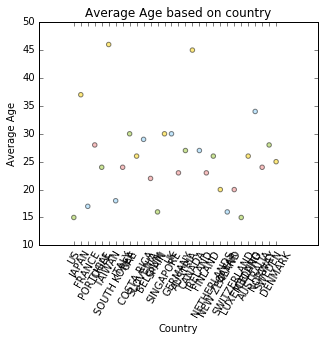

In [31]:
# Scatter plot
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(countryIndex, avgAge, c=colors, alpha=0.5)
ax.set_title("Average Age based on country", fontsize='large')
ax.set_xlabel("Country")
ax.set_ylabel("Average Age")
plt.xticks(countryIndex, country, rotation=60)
plt.show()

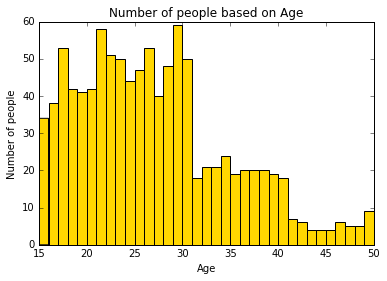

In [32]:
# Histogram
plt.hist(agelist, 35, facecolor='gold')
plt.title("Number of people based on Age", fontsize='large')
plt.xlabel("Age")
plt.ylabel("Number of people")
plt.show()

### Creating Nodes and Relationships for Neo4j Graph Database

In [ ]:
# Creating Relationships between Nodes
count = 0
connectivitylist = []
for i in range(0, 1000):
    count = 0
    if 15 <= agelist[i] <= 20:
        while count < 5:
            id = random.randint(0, 999)
            if id == i:
                continue
            else:
                connectivitylist.append([i, id])
                count += 1

    elif 21 <= agelist[i] <= 30:
        while count < 7:
            id = random.randint(0, 999)
            if id == i:
                continue
            else:
                connectivitylist.append([i, id])
                count += 1

    elif 31 <= agelist[i] <= 40:
        while count < 3:
            id = random.randint(0, 999)
            if id == i:
                continue
            else:
                connectivitylist.append([i, id])
                count += 1

    else:
        while count < 1:
            id = random.randint(0, 999)
            if id == i:
                continue
            else:
                connectivitylist.append([i, id])
                count += 1
                


### Connect to Neo4j Server and Persist the Nodes and Relationships

In [ ]:
graph = Graph("http://localhost:7474/db/data/")
graph.delete_all()
graph_nodes = []

for i in range(1000):
    node = Node("Person", name=frame2.ix[i][1], age = str(frame2.ix[i][2]), 
                      gender= frame2.ix[i][3], country= frame2.ix[i][4])
    graph_nodes.append(node)
    graph.create(node)
    
relationship_list = []
for i in connectivitylist:
    relationship = Relationship(graph_nodes[i[0]], "KNOWS", graph_nodes[i[1]])
    relationship_list.append(relationship)
    graph.create(relationship)

### Discovering 2nd Degree Neighbours as "People you may know"

In [ ]:
def recommendationList(name):
    id = nameslist.index(name)
    idlist = []
    for i in connectivitylist:
        if i[0] == id:
            idlist.append(i[1])

    iidlist = []
    for j in idlist:
        for i in connectivitylist:
            if i[0] == j and j != id:
                iidlist.append(i[1])

    iidset = set(iidlist)

    print("People " + name + " may know!" )
    for i in iidset:
        print(nameslist[i])

    print(len(iidset))


In [ ]:
recommendationList("Gavin")